In [10]:
import numpy as np
import cPickle
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
parameters = np.load("final_parameter_fixed_init_with_output3.pkl")

In [12]:
parameters.shape

(5, 5, 195)

In [13]:
toPCA = np.zeros((parameters.shape[0]*parameters.shape[1],parameters.shape[2]-1))
output_labels = []
for i in range(parameters.shape[0]):
    for j in range(parameters.shape[1]):
        index = i * parameters.shape[1] + j
        toPCA[index,:] = parameters[i,j,:-1]
        output_labels.append(parameters[i,j,-1])

In [14]:
pca = PCA(n_components=2, whiten=False)
X_r = pca.fit_transform(toPCA)
kmeans = KMeans(n_clusters=5).fit_predict(X_r)

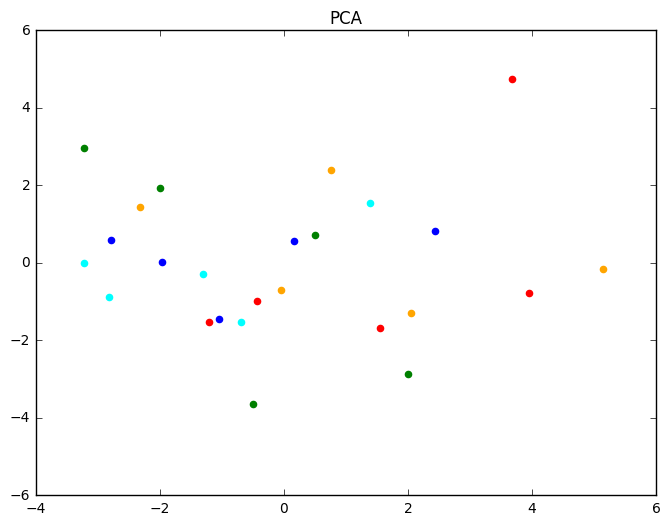

In [16]:
plt.figure()
colors = ["red","orange","blue","green","cyan"]
for i in range(X_r.shape[0]):
    plt.scatter(X_r[i,0],X_r[i,1],color = colors[int(i/5)])
plt.title('PCA')
plt.show()

In [ ]:
# Maybe they are divided based on biased left/right?